In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
wikidata = pd.read_json('wikidata-movies.json.gz', orient='record', lines=True, encoding="utf8")

In [3]:
genres = pd.read_json('genres.json.gz', orient='record', lines=True, encoding="utf8")

In [4]:
rotten_tomato = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)

In [5]:
omdb_data = pd.read_json('omdb-data.json.gz', orient='record', lines=True)

In [6]:
wikidata

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,original_language,publication_date,rotten_tomatoes_id,series,wikidata_id
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,NaN,NaN,Q1860,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,NaN,NaN,Q1860,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,NaN,NaN,Q150,2017-01-01,m/le_brio,NaN,Q43400054
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,NaN,NaN,Q1860,2017-11-17,m/a_christmas_prince,NaN,Q43401863
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,NaN,NaN,Q9240,2017-01-01,m/satans_slaves,NaN,Q41850450
5,NaN,NaN,Q258,NaN,A Small Town Called Descent,NaN,[Q959790],tt3726330,A Small Town Called Descent,NaN,NaN,NaN,Q1860,2010-07-24,m/a_small_town_called_descent,NaN,Q42048906
6,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,NaN,NaN,NaN,2017-04-07,m/orbiter_9,NaN,Q42577704
7,Q18214949,"[Q202381, Q7367121, Q179576, Q20630818, Q28474...",Q30,[Q18608206],The Kindergarten Teacher (2018 film),NaN,[Q130232],tt6952960,The Kindergarten Teacher,NaN,NaN,NaN,Q1860,2018-01-01,m/the_kindergarten_teacher_2018,NaN,Q47461695
8,NaN,NaN,Q30,[Q22073902],Who the Fuck Is That Guy? The Fabulous Journey...,NaN,[Q93204],tt4958390,Who the Fuck is That Guy? The Fabulous Journey...,NaN,NaN,NaN,Q1860,2017-07-21,m/who_the_fk_is_that_guy_the_fabulous_journey_...,NaN,Q47483224
9,NaN,NaN,Q30,NaN,The Black Dove,NaN,[Q130232],tt1844790,The Black Dove,NaN,NaN,NaN,Q1860,2012-04-19,m/the_black_dove,NaN,Q42048757


# 3. See which country of origin contains the most movies

In [48]:
wikidata.groupby('country_of_origin').count().sort_values('imdb_id', ascending=False)

,based_on,cast_member,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,original_language,publication_date,rotten_tomatoes_id,series,wikidata_id
country_of_origin,,,,,,,,,,,,,,,,
Q30,1828,17422,17515,20213,5668,20213,20213,20207,602,4013,6131,19838,20043,20213,547,20213
Q145,483,3197,3155,3511,868,3511,3511,3509,62,733,810,3459,3494,3511,78,3511
Q142,334,3132,3221,3300,808,3300,3300,3296,31,433,800,3207,3299,3300,68,3300
Q668,58,1266,1173,1322,115,1322,1322,1322,1,114,142,1313,1322,1322,15,1322
Q183,104,1171,1242,1288,293,1288,1288,1288,16,259,261,1267,1287,1288,18,1288
Q38,47,1168,1185,1209,235,1209,1209,1208,4,151,83,1188,1209,1209,17,1209
Q16,55,921,954,1157,363,1157,1157,1156,8,217,305,1103,1151,1157,16,1157
Q17,140,954,1054,1146,99,1146,1146,1146,3,198,153,1101,1143,1146,44,1146
Q8646,17,670,632,720,180,720,720,720,0,53,47,702,716,720,16,720


In [37]:
genres

,genre_label,wikidata_id
0,novella,Q43334491
1,cityscape,Q42304051
2,drama with music,Q39894018
3,lunar art,Q47909472
4,Tsukuri monogatari,Q42922249
5,traditional fairy tale,Q42402646
6,fantasy video game,Q42409239
7,propaganda song,Q42681239
8,miniaturist,Q47494964
9,Breton rock,Q47005557


In [36]:
rotten_tomato

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in
5,3.7,74.0,1498.0,7.0,88.0,tt1787725,m/if_a_tree_falls_a_story_of_the_earth_liberat...
6,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers
7,3.2,50.0,242347.0,4.9,35.0,tt1611224,m/abraham_lincoln_vampire_hunter
8,4.0,87.0,427.0,7.4,100.0,tt3966544,m/lost_soul_the_doomed_journey_of_richard_stan...
9,3.7,74.0,260776.0,7.4,85.0,tt0780521,m/1196003-princess_and_the_frog


# 1. see if audience average and critic average correlate with one another. Look for the correlation coefficient and see what it gives

In [6]:
rotten_noNull = rotten_tomato[rotten_tomato['audience_average'].notnull()]
rotten_noNull = rotten_noNull.dropna()
random = rotten_noNull.sample(n=1000)
x1 = np.array(random['critic_average'])
y1 = np.array(random['audience_average'])

In [46]:
reg1 = stats.linregress(x1,y1)

In [47]:
reg1

LinregressResult(slope=0.20534206090957952, intercept=2.149276350757791, rvalue=0.6845691572285402, pvalue=3.447190195919647e-139, stderr=0.006921366045024745)

In [29]:
print(reg1.pvalue)

0.0


In [17]:
print(reg1.rvalue)

0.6722425894846574


Text(0, 0.5, 'Audience Average')

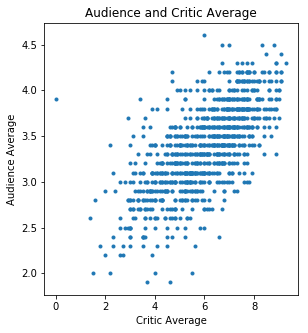

In [48]:
plt.figure(figsize=(10, 5)) # change the size to something sensible
plt.subplot(1, 2, 1)
plt.plot(x1, y1, '.')
plt.title('Audience and Critic Average')
plt.xlabel('Critic Average')
plt.ylabel('Audience Average')

In [35]:
rotten_noNull

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in
5,3.7,74.0,1498.0,7.0,88.0,tt1787725,m/if_a_tree_falls_a_story_of_the_earth_liberat...
6,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers
7,3.2,50.0,242347.0,4.9,35.0,tt1611224,m/abraham_lincoln_vampire_hunter
8,4.0,87.0,427.0,7.4,100.0,tt3966544,m/lost_soul_the_doomed_journey_of_richard_stan...
9,3.7,74.0,260776.0,7.4,85.0,tt0780521,m/1196003-princess_and_the_frog


# 2. See if the country of origin matters in the percentage of people who rate the movie (chi squared)

In [49]:
wikidata

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,original_language,publication_date,rotten_tomatoes_id,series,wikidata_id
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,NaN,NaN,Q1860,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,NaN,NaN,Q1860,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,NaN,NaN,Q150,2017-01-01,m/le_brio,NaN,Q43400054
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,NaN,NaN,Q1860,2017-11-17,m/a_christmas_prince,NaN,Q43401863
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,NaN,NaN,Q9240,2017-01-01,m/satans_slaves,NaN,Q41850450
5,NaN,NaN,Q258,NaN,A Small Town Called Descent,NaN,[Q959790],tt3726330,A Small Town Called Descent,NaN,NaN,NaN,Q1860,2010-07-24,m/a_small_town_called_descent,NaN,Q42048906
6,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,NaN,NaN,NaN,2017-04-07,m/orbiter_9,NaN,Q42577704
7,Q18214949,"[Q202381, Q7367121, Q179576, Q20630818, Q28474...",Q30,[Q18608206],The Kindergarten Teacher (2018 film),NaN,[Q130232],tt6952960,The Kindergarten Teacher,NaN,NaN,NaN,Q1860,2018-01-01,m/the_kindergarten_teacher_2018,NaN,Q47461695
8,NaN,NaN,Q30,[Q22073902],Who the Fuck Is That Guy? The Fabulous Journey...,NaN,[Q93204],tt4958390,Who the Fuck is That Guy? The Fabulous Journey...,NaN,NaN,NaN,Q1860,2017-07-21,m/who_the_fk_is_that_guy_the_fabulous_journey_...,NaN,Q47483224
9,NaN,NaN,Q30,NaN,The Black Dove,NaN,[Q130232],tt1844790,The Black Dove,NaN,NaN,NaN,Q1860,2012-04-19,m/the_black_dove,NaN,Q42048757


In [52]:
rotten_tomato

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in
5,3.7,74.0,1498.0,7.0,88.0,tt1787725,m/if_a_tree_falls_a_story_of_the_earth_liberat...
6,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers
7,3.2,50.0,242347.0,4.9,35.0,tt1611224,m/abraham_lincoln_vampire_hunter
8,4.0,87.0,427.0,7.4,100.0,tt3966544,m/lost_soul_the_doomed_journey_of_richard_stan...
9,3.7,74.0,260776.0,7.4,85.0,tt0780521,m/1196003-princess_and_the_frog


In [60]:
merge = pd.merge(wikidata, rotten_tomato, on=['imdb_id'])

In [118]:
data3 = merge[['country_of_origin', 'audience_average', 'critic_average']]
data3 = data3[data3['audience_average'].notnull()]
data3 = data3.dropna()

In [119]:
data3['audience_average'] = data3['audience_average']*4

In [121]:
data3['critic_average'] = data3['critic_average']*2

In [122]:
data3

,country_of_origin,audience_average,critic_average
0,Q145,15.6,7.4
2,Q142,13.6,13.4
3,Q30,12.8,13.0
6,Q29,12.4,11.0
10,Q219,11.2,12.4
12,Q219,11.2,10.8
15,Q801,15.6,14.0
17,Q30,14.4,16.4
18,Q183,9.2,7.0
20,Q33,16.0,13.4


In [123]:
data3 = data3.groupby('country_of_origin').mean()

In [124]:
data3

,audience_average,critic_average
country_of_origin,,
Q1009,14.800000,14.200000
Q1028,15.600000,13.300000
Q1037,16.000000,12.200000
Q1041,14.600000,15.300000
Q115,14.400000,14.000000
Q142,14.055835,13.262090
Q145,13.638330,12.453028
Q148,14.070588,12.729412
Q15180,16.215385,16.146154


In [125]:
contingency = data3.iloc[:,0:2].values

In [126]:
contingency

array([[14.8       , 14.2       ],
       [15.6       , 13.3       ],
       [16.        , 12.2       ],
       [14.6       , 15.3       ],
       [14.4       , 14.        ],
       [14.05583524, 13.26209001],
       [13.63833039, 12.45302763],
       [14.07058824, 12.72941176],
       [16.21538462, 16.14615385],
       [14.56666667, 13.27222222],
       [14.42051282, 13.21025641],
       [13.23381443, 11.58226804],
       [14.89210526, 13.40460526],
       [13.85538462, 12.47794872],
       [13.2       , 14.2       ],
       [14.76      , 13.5       ],
       [15.6       , 14.1       ],
       [14.25806452, 13.49032258],
       [13.6       , 15.8       ],
       [14.88888889, 13.47777778],
       [15.6       , 13.2       ],
       [14.48421053, 14.48421053],
       [12.4       , 12.6       ],
       [15.1       , 12.2       ],
       [13.2       , 13.6       ],
       [15.13333333, 14.23333333],
       [14.6       , 14.1       ],
       [13.2       , 12.1       ],
       [15.2       ,

In [127]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)

In [128]:
print(p)

1.0


In [107]:
print(expected)

[[ 85.72000598  92.27999402]
 [ 79.21876958  85.28123042]
 [ 78.49640997  84.50359003]
 [ 79.70034264  85.79965736]
 [ 75.60697157  81.39302843]
 [ 67.10138471  72.23652528]
 [ 62.03827528  66.78594577]
 [ 63.90757882  68.79830354]
 [ 85.86818231  92.43950999]
 [ 68.63753912  73.89023865]
 [ 68.27224331  73.49698745]
 [ 55.29551041  59.52717001]
 [ 71.8098313   77.30530028]
 [ 62.7625535   67.56565162]
 [ 70.30966783  75.69033217]
 [ 71.80254434  77.29745566]
 [ 80.90427531  87.09572469]
 [ 71.52136781  76.99476123]
 [ 73.19910623  78.80089377]
 [ 74.18900643  79.86654913]
 [ 81.38584838  87.61415162]
 [ 73.09772243  78.69175125]
 [ 48.6388798   52.3611202 ]
 [ 68.86494863  74.13505137]
 [ 71.75438703  77.24561297]
 [ 80.5832266   86.75010673]
 [ 78.25562344  84.24437656]
 [ 50.8059586   54.6940414 ]
 [ 82.83056758  89.16943242]
 [ 79.21876958  85.28123042]
 [ 54.65854314  58.84145686]
 [ 52.22610775  56.22287184]
 [ 62.80105919  67.60710408]
 [ 76.94467454  82.83310324]
 [ 64.32096276

# 4. Do a T-Test on the total audience average of who liked it and total critic average of positive reviews to see if in general, does the audience like movies easier than critics giving positive reviews ( need to make sure they are normal and equal variance )

In [130]:
x4 = np.array(rotten_noNull['critic_average'])
y4 = np.array(rotten_noNull['audience_average'])

In [132]:
ttest = stats.ttest_ind(x4,y4)

In [133]:
ttest.pvalue

0.0

# 5. Split movies so one set is 2000 and before and the other is 2000 and after. Take the audience average of them both and do a mann whitney test to see if people like the older movies more or the newer ones
# Can do the same for critic average and see what critics think too

In [135]:
rotten_tomato

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in
5,3.7,74.0,1498.0,7.0,88.0,tt1787725,m/if_a_tree_falls_a_story_of_the_earth_liberat...
6,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers
7,3.2,50.0,242347.0,4.9,35.0,tt1611224,m/abraham_lincoln_vampire_hunter
8,4.0,87.0,427.0,7.4,100.0,tt3966544,m/lost_soul_the_doomed_journey_of_richard_stan...
9,3.7,74.0,260776.0,7.4,85.0,tt0780521,m/1196003-princess_and_the_frog


In [136]:
wikidata

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,original_language,publication_date,rotten_tomatoes_id,series,wikidata_id
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,NaN,NaN,Q1860,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,NaN,NaN,Q1860,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,NaN,NaN,Q150,2017-01-01,m/le_brio,NaN,Q43400054
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,NaN,NaN,Q1860,2017-11-17,m/a_christmas_prince,NaN,Q43401863
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,NaN,NaN,Q9240,2017-01-01,m/satans_slaves,NaN,Q41850450
5,NaN,NaN,Q258,NaN,A Small Town Called Descent,NaN,[Q959790],tt3726330,A Small Town Called Descent,NaN,NaN,NaN,Q1860,2010-07-24,m/a_small_town_called_descent,NaN,Q42048906
6,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,NaN,NaN,NaN,2017-04-07,m/orbiter_9,NaN,Q42577704
7,Q18214949,"[Q202381, Q7367121, Q179576, Q20630818, Q28474...",Q30,[Q18608206],The Kindergarten Teacher (2018 film),NaN,[Q130232],tt6952960,The Kindergarten Teacher,NaN,NaN,NaN,Q1860,2018-01-01,m/the_kindergarten_teacher_2018,NaN,Q47461695
8,NaN,NaN,Q30,[Q22073902],Who the Fuck Is That Guy? The Fabulous Journey...,NaN,[Q93204],tt4958390,Who the Fuck is That Guy? The Fabulous Journey...,NaN,NaN,NaN,Q1860,2017-07-21,m/who_the_fk_is_that_guy_the_fabulous_journey_...,NaN,Q47483224
9,NaN,NaN,Q30,NaN,The Black Dove,NaN,[Q130232],tt1844790,The Black Dove,NaN,NaN,NaN,Q1860,2012-04-19,m/the_black_dove,NaN,Q42048757


In [138]:
omdb_data

,imdb_id,omdb_awards,omdb_genres,omdb_plot
0,tt0060814,Nominated for 2 Oscars. Another 2 nominations.,"[Drama, History, War]","In this sprawling, star-laden film, we see the..."
1,tt2379713,Won 1 Oscar. Another 7 wins & 32 nominations.,"[Action, Adventure, Thriller]",A cryptic message from the past sends James Bo...
2,tt0230575,N/A,"[Comedy, Horror]","The makers of this parody of ""Night of the Liv..."
3,tt0065988,Nominated for 1 Oscar. Another 5 wins & 8 nomi...,"[Adventure, Comedy, Drama]",Jack Crabb is 121 years old as the film begins...
4,tt1995390,2 nominations.,"[Crime, Drama, Thriller]","When Perry and his girlfriend, Gail, cross pat..."
5,tt0066921,Nominated for 4 Oscars. Another 9 wins & 19 no...,"[Crime, Drama, Sci-Fi]","Protagonist Alex DeLarge is an ""ultraviolent"" ..."
6,tt1298650,2 wins & 31 nominations.,"[Action, Adventure, Fantasy]",Captain Jack Sparrow (Depp) crosses paths with...
7,tt0069947,Nominated for 1 Oscar. Another 1 win & 10 nomi...,"[Crime, Drama, Thriller]",It is the early 60s in France. The remaining s...
8,tt0116629,Won 1 Oscar. Another 34 wins & 34 nominations.,"[Action, Adventure, Sci-Fi]","On July 2nd, communications systems worldwide ..."
9,tt0057012,Nominated for 4 Oscars. Another 13 wins & 7 no...,"[Comedy, War]",Paranoid Brigadier General Jack D. Ripper of B...


In [142]:
wikidata.iloc[0, 13]

AttributeError: 'str' object has no attribute 'type'

In [6]:
year = wikidata
year = year[['imdb_id', 'publication_date']]
year['publication_date'] = year['publication_date'].str[0:4]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
year = year.dropna()

In [8]:
year['publication_date'] = year['publication_date'].astype(int)

In [9]:
year_less_2000 = year[year['publication_date'] < 2000]
year_2000 = year[year['publication_date'] >= 2000]

In [10]:
merge5_1 = pd.merge(rotten_tomato, year_less_2000, on=['imdb_id'])
merge5_2 = pd.merge(rotten_tomato, year_2000, on=['imdb_id'])

In [11]:
merge5_1

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id,publication_date
0,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer,1986
1,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers,1996
2,3.2,66.0,46826.0,7.3,85.0,tt0115956,m/courage_under_fire,1996
3,3.4,69.0,23375.0,7.4,90.0,tt0068555,m/everything_you_always_wanted_to_know_about_s...,1972
4,3.3,57.0,109.0,NaN,NaN,tt0230575,m/night_of_the_day_of_the_dawn_of_the_son_of_t...,1991
5,4.0,93.0,435893.0,8.4,89.0,tt0066921,m/clockwork_orange,1971
6,3.4,73.0,70542.0,6.0,74.0,tt0105112,m/patriot_games,1992
7,4.0,91.0,336264.0,8.5,90.0,tt0083658,m/Blade_Runner,1982
8,3.8,89.0,297648.0,9.2,92.0,tt0062622,m/1000085-2001_a_space_odyssey,1968
9,4.1,95.0,845472.0,8.7,95.0,tt0102926,m/silence_of_the_lambs,1991


In [12]:
year_less_2000_avg = merge5_1[['audience_average']]
year_2000_avg = merge5_2[['audience_average']]

In [13]:
year_less_2000_avg = year_less_2000_avg.dropna()
year_2000_avg = year_2000_avg.dropna()

In [58]:
year_less_2000_avg2 = year_less_2000_avg.sample(n=1000)
year_2000_avg2 = year_2000_avg.sample(n=1000)

In [59]:
year_less_2000_avg2 = year_less_2000_avg2.values
year_2000_avg2 = year_2000_avg2.values

In [60]:
year_less_2000_avg2 = year_less_2000_avg2.ravel()
year_2000_avg2 = year_2000_avg2.ravel()

In [61]:
stats.mannwhitneyu(year_less_2000_avg2, year_2000_avg2).pvalue

0.061343448360675

In [16]:
MLdata = rotten_noNull[['audience_average','audience_percent', 'critic_average','critic_percent']]

In [23]:
X = np.array(MLdata.iloc[:,1:4].sample(n=2000))

In [25]:
X

array([[48. ,  5.8, 63. ],
       [90. ,  8.5, 96. ],
       [79. ,  6.8, 90. ],
       ...,
       [56. ,  5.6, 59. ],
       [72. ,  6.5, 72. ],
       [77. ,  7.1, 91. ]])

In [21]:
Y = np.array(MLdata.iloc[:,0])

In [22]:
Y

array([3.9, 4.1, 3.6, ..., 3.4, 4.1, 2.9])

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

In [137]:
X = MLdata.iloc[:,1:4].values
y = MLdata.iloc[:,0].values.astype('int')

In [61]:
lab_enc = preprocessing.LabelEncoder()

In [65]:
y = lab_enc.fit_transform(y)

In [123]:
y

array([3, 4, 3, ..., 3, 3, 3])

In [138]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [110]:
y_train = np.array(y_train)

In [130]:
y_train

array([3, 3, 3, ..., 4, 3, 2])

In [142]:
model = make_pipeline(StandardScaler(),
                      GaussianNB()
)

In [146]:
model = RandomForestClassifier(n_estimators = 100,
                               max_depth=3, min_samples_leaf=10)

In [147]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
model.score(X_valid, y_valid)

0.8305044226631604